## Chinese Character Writing and Stroke Trajectory Optimization



In [1]:
# imports
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [22]:
#Here we import our user-generated handwritten data of 3 chinese characters 
#with varing degree of complexity:

#'heart','sky' -simple
#'moon' -medium
#'love' - complex
skyFile = "/content/drive/My Drive/Colab Notebooks/writingData/sky.csv"
heartFile = "/content/drive/My Drive/Colab Notebooks/writingData/heart.csv"
moonFile = "/content/drive/My Drive/Colab Notebooks/writingData/moon.csv"
loveFile = "/content/drive/My Drive/Colab Notebooks/writingData/love.csv"

#convert the csv file to an array
with open(skyFile) as file_name:
    dataArray = np.loadtxt(file_name, delimiter=",")

#find out the number of trials in the file (# of times the character was reapeatedly written)
numTrials =0
i = 0
while(i <dataArray.size/2): #The different trials of data was seperated by a dummy number - '-9999' from my capture software
  if(dataArray[i,0] <= -9998):
    numTrials+=1
  i+=1

#put the trials into a list of numpy arrays for parsing
i=0
trials = [] #trials [0] [1] ..... = each character trace
trajectory = dataArray[0]  
while(i <dataArray.size/2 -1):
  if(dataArray[i,0] <= -9998):
      i+=1
      trials.append(trajectory)
      trajectory = dataArray[i]  
  trajectory = np.vstack( (trajectory,dataArray[i]) )
  i+=1


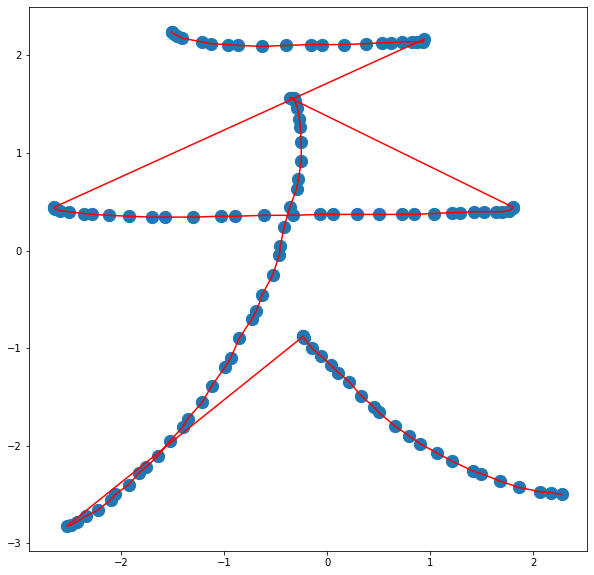

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# let's print out one random trial to see the trajectories
plt.figure(figsize=[10,10])

trial = trials[0]
plt.plot(trial[:,[0]],trial[:,[1]],'r-')
plt.scatter(trial[:,[0]],trial[:,[1]],s=150)

# trial = trials[3]
# # plt.plot(trial[:,[0]],trial[:,[1]])
# plt.scatter(trial[:,[0]],trial[:,[1]])

# trial = trials[6]
# # plt.plot(trial[:,[0]],trial[:,[1]])
# plt.scatter(trial[:,[0]],trial[:,[1]])

# trial = trials[18]
# # plt.plot(trial[:,[0]],trial[:,[1]])
# plt.scatter(trial[:,[0]],trial[:,[1]])

In [11]:
pip install dtw-python


     |████████████████████████████████| 580 kB 4.2 MB/s 


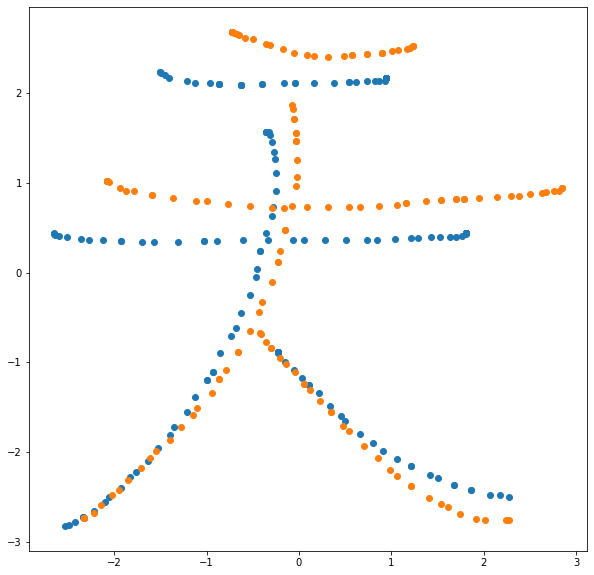

In [24]:
from dtw import *

#use dtw to align the trials and return the aligned trials 
def dtw_alignment(x,y):
  alignment = dtw(x, y, keep_internals=True)
  x_align = x[alignment.index1]
  y_align = y[alignment.index2]
  return x_align,y_align

#plot one set of aligned trials as example - the # of data points should converge here
x = trials[0]
y = trials[2]
x,y = dtw_alignment(x,y)

plt.figure(figsize=[10,10])
trial = x
plt.scatter(trial[:,[0]],trial[:,[1]])
trial = y
plt.scatter(trial[:,[0]],trial[:,[1]])

In [25]:
#use the first trial as the 'hidden layer' to start the algorithm
hiddenTrajectory = trials[0]
# run the iterative optimization process:
# 1. align hidden trajectory with next trial
# 2. process data to obtain new optimal/hidden trajectory (in this case using mean)
# 3. override/update hidden trajectory
i = 1
while i < len(trials):
  x = hiddenTrajectory
  y = trials[i]

  x,y = dtw_alignment(x,y)
  # print(x.shape)
  # print(y.shape)
  hiddenTrajectory = np.mean([x,y],axis =0)
  i+=1
#note that every dtw iteration the trajectory length increases
print("starting trajectory length:")
print(trials[0].shape)
print("final hidden trajectory length:")
print(hiddenTrajectory.shape)


starting trajectory length:
(116, 2)
final hidden trajectory length:
(653, 2)


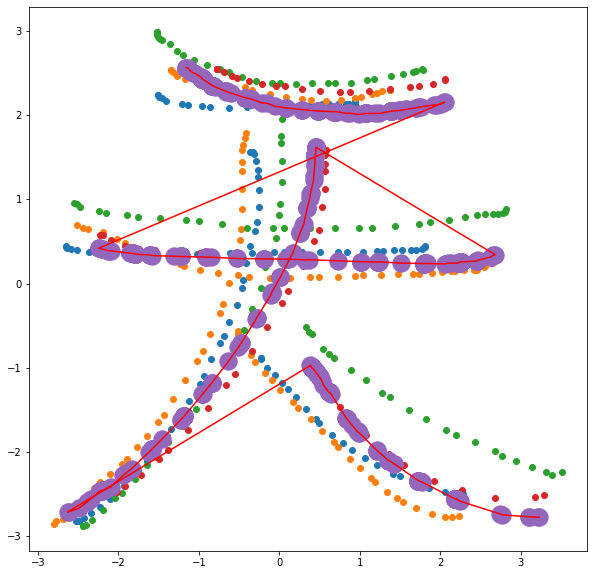

In [26]:
plt.figure(figsize=[10,10])

trial = trials[0]
# plt.plot(trial[:,[0]],trial[:,[1]])
plt.scatter(trial[:,[0]],trial[:,[1]])

trial = trials[3]
# plt.plot(trial[:,[0]],trial[:,[1]])
plt.scatter(trial[:,[0]],trial[:,[1]])

trial = trials[6]
# plt.plot(trial[:,[0]],trial[:,[1]])
plt.scatter(trial[:,[0]],trial[:,[1]])

trial = trials[18]
# plt.plot(trial[:,[0]],trial[:,[1]])
plt.scatter(trial[:,[0]],trial[:,[1]])

trial = hiddenTrajectory
plt.plot(trial[:,[0]],trial[:,[1]],'r-')
plt.scatter(trial[:,[0]],trial[:,[1]],s=300)